# Our Performance Task 3 deals with Clustering

Aside from the kind of dataset being fed to supervised (labeled)/unsupervised (unlabeled) models, the goals of Supervised and Unsupervised Learning are also different. Supervised is used to predict unseen data by doing classification or regression to  while Unsupervised is used to get insights from large volumes of data by doing clustering, association, or dimensionality reduction. 

A lot of differences are discussed here including their applications: https://www.v7labs.com/blog/supervised-vs-unsupervised-learning

This Performance Task covers the following sections. 
1. It will first introduce you on how to do basic clustering using K-means
2. Instructions on how you can do the PT3.
3. Deliverables

1.1 Data Preparation - We used a dummy dataset here (using sklearn.datasets) to show you how k-Means does it clustering in action

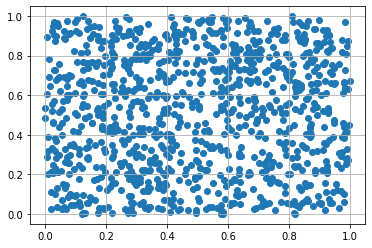

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

n_samples = 1000
centers = 5

#Different dataset patterns to try:
def blobs(n_samples, centers):
  x,y = make_blobs(n_samples=n_samples, centers=centers)
  return x,y

def moons(n_samples):
  x,y = make_moons(n_samples=n_samples, noise=0.05)
  return x,y

def circles(n_samples):
  x,y = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
  return x,y

def aniso(n_samples):
  X, y = make_blobs(n_samples=n_samples, random_state=170)
  transformation = [[0.6, -0.6], [-0.4, 0.8]]
  X_aniso = np.dot(X, transformation)
  return X_aniso, y

def varied(n_samples):
  x, y = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
  return x,y

def random(n_samples):
  x, y = np.random.rand(n_samples, 2), None
  return x,y

# x,y = moons(n_samples)
# x,y = blobs(n_samples, centers)
# x,y = circles(n_samples)
# x,y = aniso(n_samples)
# x,y = varied(n_samples)
x,y = random(n_samples)

plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0], x[:,1])
plt.show()

1.2 Performing K-means on the dataset. We run a simple K-means algorithm specifying the number of clusters as 5. We don't have any proof that 5 is indeed the optimal number of clusters. We just tested it to show how we color the points forming the clusters.  

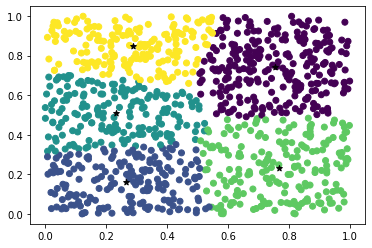

In [ ]:
from sklearn.cluster import KMeans
clf=KMeans(n_clusters=5)
clf.fit(x)
clusters=clf.cluster_centers_
# print(clf.labels_)

plt.scatter(x[:,0], x[:,1], c=clf.labels_)
plt.scatter(clusters[:,0], clusters[:,1], c='black', marker='*')
plt.show()

1.3 Optimizing the clustering performance
- Two Methods for Identifying the optimal value for *k* in **k**-Means:
1. Silhouette Method - k-Means is performed iteratively from k-start to kmax. For each iteration, the method is computed. To obtain the optimal number of clusters, plot(n_cluster, scores). Get the coordinate (x, maximum score) where x is the optimal number of clusters. NOTE: 0 < k-start < kmax

2. Elbow Mehod - k-Means is performed iteratively from k-start to kmax. For each iteration, the method is computed. To obtain the optimal number of clusters, G = plot(n_cluster, scores). Visually observe the graph G. Find the coordinate (x, y) that servers as the 'elbow' of the graph. NOTE: This may return many 'elbows' as graphs may show multiple sharp edges at some cases. With this, you may need to use silhouette method to verify which of the elbows is the optimal one. 

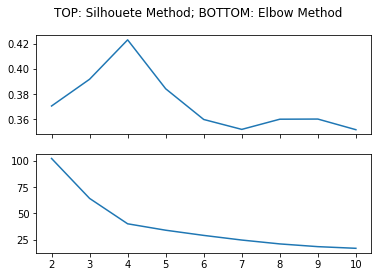

In [ ]:
from sklearn.metrics import silhouette_score

#Method 1: Silhouette Method
def sc(x,kmax):
  sil = [] 

  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))
  return sil

#Method 2: Elbow Method
def em(x,kmax):
  sse = []
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(x)
    curr_sse = 0

    for i in range(len(x)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (x[i, 0] - curr_center[0]) ** 2 + (x[i, 1] - curr_center[1]) ** 2    
    sse.append(curr_sse)
  return sse
  
kmax = 10 #max number of cluster to consider
n_cluster = range(2,kmax+1,1)
fig, axs = plt.subplots(2)
fig.suptitle('TOP: Silhouete Method; BOTTOM: Elbow Method')
axs[0].plot(n_cluster, sc(x, kmax))
axs[1].plot(n_cluster, em(x, kmax))

for ax in fig.get_axes():
    ax.label_outer()


2. Performance Task 3:
- Given the graph above, can you now identify the optimal k for this dataset? If so, what's k? Explain.
- With the optimal k, perform k-Means again on the dataset and compare the results to the previous one. What have you found? Explain
- Extra: If the Elbow method returned two or more elbows, try x coordinate of each elbow and perform (2) where x = k. What have you found? Explain
- Prove that elbow and sillhouette methods are indeed used for getting the optimal number of clusters using (2) and (3) as evidence.
- Try two hierarchical clustering algorithms and DBScan using sklearn.cluster. NOTE: hierarchical clustering algorithms can be found in sklearn.cluster.AgglomerativeClustering. Just change the linkage type parameter. 
- Compare the results of k-Means, two hierarchical clustering algorithms, and DBScan for different dataset patterns. NOTE: For k-Means, Let k = 2 for Circles, 2 for moons, 3 for varied, 3 for aniso, 3 for blobs, and 3 for random.
- Discussion of results from (6) 
- Conclusion

3. Deliverables
- PDF File for the results and discussion
- Notebook

# Answers

## Given the graph above, can you now identify the optimal k for this dataset? If so, what's k? Explain.

**Yes. both method (silhouette and elbow) tells that 4 is the optimal number of clusters since it is the highest y-value in the graph using silhouette method and the sharpest edge at elbow method for verification.**

## With the optimal k, perform k-Means again on the dataset and compare the results to the previous one. What have you found? Explain

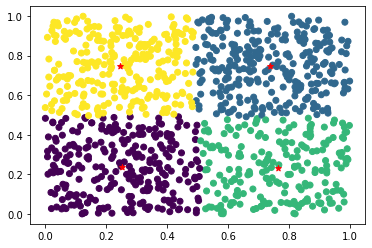

In [ ]:
from sklearn.cluster import KMeans
def kmeans(number_of_cluster,data):
  clf=KMeans(n_clusters=number_of_cluster)
  clf.fit(data)
  clusters=clf.cluster_centers_
  # print(clf.labels_)
  return clf
def kmeanshow_plot(model_result,data):
  plt.scatter(data[:,0], data[:,1], c=model_result.labels_)
  plt.scatter(model_result.cluster_centers_[:,0], model_result.cluster_centers_[:,1], c='red', marker='*')
  plt.show()

kmeanshow_plot(kmeans(4,x),x)

**The data is so dense that we cannot really tell the optimal number of clusters in this dataset. But compared to the result of k=5, k=4 is much better at dividing the data.**

## Extra: If the Elbow method returned two or more elbows, try x coordinate of each elbow and perform (2) where x = k. What have you found? Explain

3 clusters


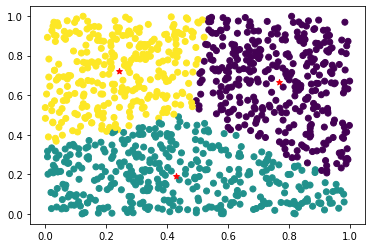

4 clusters


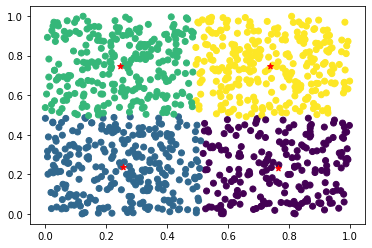

In [ ]:
print("3 clusters")
kmeanshow_plot(kmeans(3,x),x)
print("4 clusters")
kmeanshow_plot(kmeans(4,x),x)

**I find that k=4 has much more equal in distribution of data compared to k=3.**

## Prove that elbow and sillhouette methods are indeed used for getting the optimal number of clusters using (2) and (3) as evidence.

**Elbow and sillhouette methods are great for getting the optimal number of clusters as we can see at the plots created above. So far we have seen the plot from 3,4, and 5 number of clusters in the given dataset and 4 cluster has the most equal number of area distribution among the three number of clusters.**

## Try two hierarchical clustering algorithms and DBScan using sklearn.cluster. NOTE: hierarchical clustering algorithms can be found in sklearn.cluster.AgglomerativeClustering. Just change the linkage type parameter.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

single_hierachical = AgglomerativeClustering(linkage='single')
average_hierachical = AgglomerativeClustering(linkage='average')
dbscan = DBSCAN()
def Single_Link_Clustering(data):
  single_hierachial_result = single_hierachical.fit(data)
  return single_hierachial_result

def Average_Link_Clustering(data):
  average_hierachial_result = average_hierachical.fit(data)
  return average_hierachial_result

def DBSCAN(data):
  dbscan_result = dbscan.fit(data)
  return dbscan_result

# Visualization of the created clusters
%matplotlib inline

def show_plot(model_result,data):
  plt.scatter(data[:,0], data[:,1], c=model_result.labels_)
  plt.show()



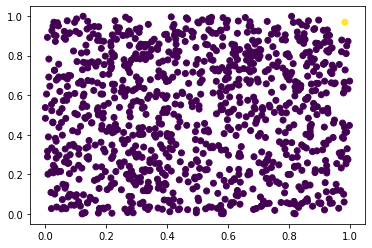

              Single Link Clustering




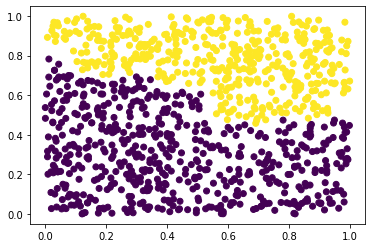

              Average Link Clustering




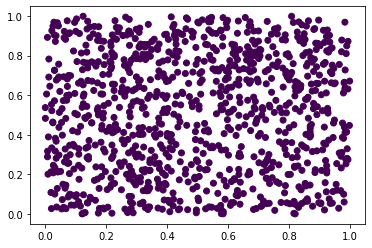

                      DBSCAN




In [ ]:
#@title
show_plot(Single_Link_Clustering(x),x)
print ("              Single Link Clustering\n\n")

show_plot(Average_Link_Clustering(x),x)
print ("              Average Link Clustering\n\n")

show_plot(DBSCAN(x),x)
print ("                      DBSCAN\n\n")

**Since the form of data is very dense. I find DBSCAN to be the best algorithm among the three.**

**Since the form of data is very dense. I find DBSCAN to be the best algorithm among the three.**

## Compare the results of k-Means, two hierarchical clustering algorithms, and DBScan for different dataset patterns. NOTE: For k-Means, Let k = 2 for Circles, 2 for moons, 3 for varied, 3 for aniso, 3 for blobs, and 3 for random.

In [ ]:
moon_x,moon_y = moons(n_samples)
blobs_x,blobs_y = blobs(n_samples, centers)
circles_x,circles_y = circles(n_samples)
aniso_x,aniso_y = aniso(n_samples)
varied_x,varied_xy = varied(n_samples)



### **For Moon Dataset Pattern**



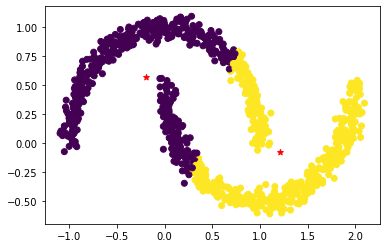

                      KMeans




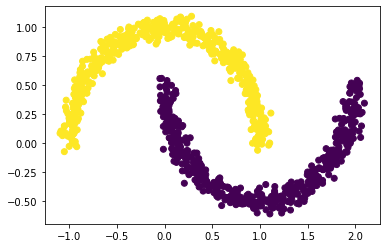

              Single Link Clustering




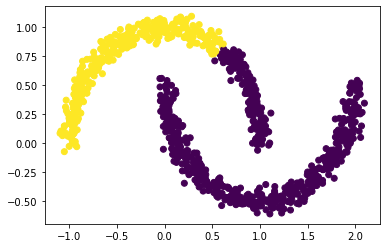

              Average Link Clustering




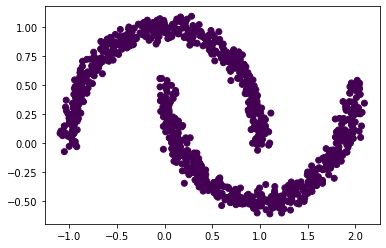

                      DBSCAN




In [ ]:
#@title
moon_kmeanshow_plot = kmeanshow_plot(kmeans(2,moon_x),moon_x)
print ("                      KMeans\n\n")

moon_single_plot = show_plot(Single_Link_Clustering(moon_x),moon_x)
print ("              Single Link Clustering\n\n")

moon_average_plot = show_plot(Average_Link_Clustering(moon_x),moon_x)
print ("              Average Link Clustering\n\n")

moon_dbscan_plot = show_plot(DBSCAN(moon_x),moon_x)
print ("                      DBSCAN\n\n")

### **For Blobs Dataset Pattern**

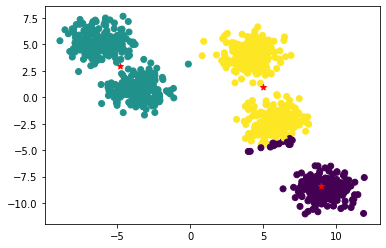

                      KMeans




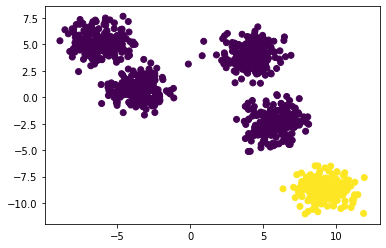

              Single Link Clustering




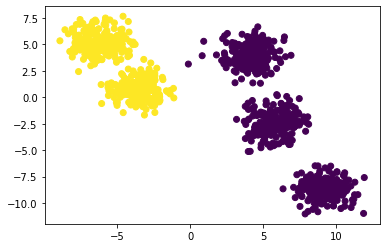

              Average Link Clustering




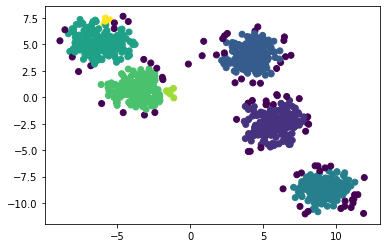

                      DBSCAN




In [ ]:
#@title
moon_kmeanshow_plot = kmeanshow_plot(kmeans(3,blobs_x),blobs_x)
print ("                      KMeans\n\n")

blobs_single_plot = show_plot(Single_Link_Clustering(blobs_x),blobs_x)
print ("              Single Link Clustering\n\n")

blobs_average_plot = show_plot(Average_Link_Clustering(blobs_x),blobs_x)
print ("              Average Link Clustering\n\n")

blobs_dbscan_plot = show_plot(DBSCAN(blobs_x),blobs_x)
print ("                      DBSCAN\n\n")

### **For Circle Dataset Pattern**

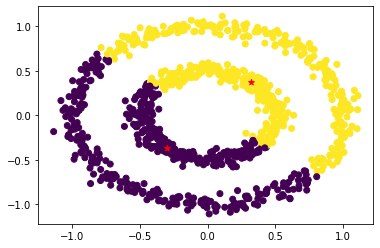

                      KMeans




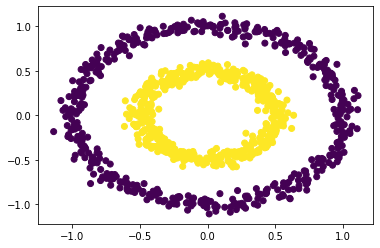

              Single Link Clustering




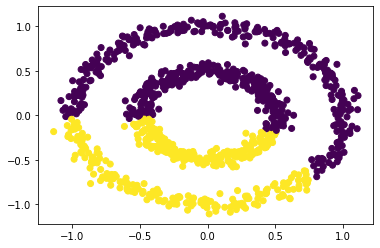

              Average Link Clustering




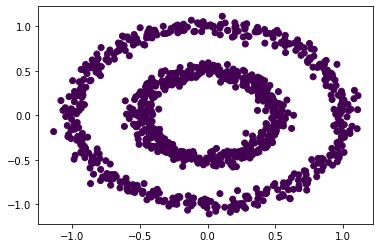

                      DBSCAN




In [ ]:
#@title
circles_kmeanshow_plot = kmeanshow_plot(kmeans(2,circles_x),circles_x)
print ("                      KMeans\n\n")

circles_single_plot = show_plot(Single_Link_Clustering(circles_x),circles_x)
print ("              Single Link Clustering\n\n")

circles_average_plot = show_plot(Average_Link_Clustering(circles_x),circles_x)
print ("              Average Link Clustering\n\n")

circles_dbscan_plot = show_plot(DBSCAN(circles_x),circles_x)
print ("                      DBSCAN\n\n")

### **For Aniso Dataset Pattern**

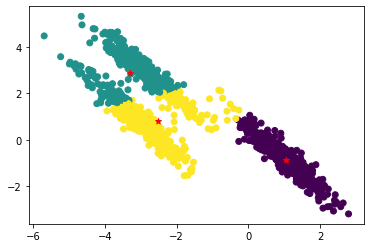

                      KMeans




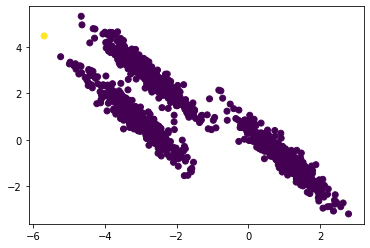

              Single Link Clustering




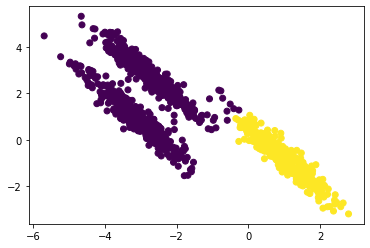

              Average Link Clustering




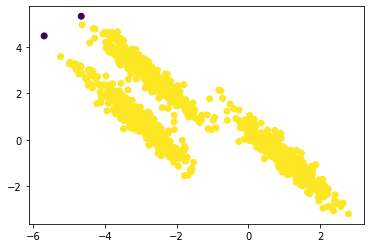

                      DBSCAN




In [ ]:
#@title
aniso_kmeanshow_plot = kmeanshow_plot(kmeans(3,aniso_x),aniso_x)
print ("                      KMeans\n\n")

aniso_single_plot = show_plot(Single_Link_Clustering(aniso_x),aniso_x)
print ("              Single Link Clustering\n\n")

aniso_average_plot = show_plot(Average_Link_Clustering(aniso_x),aniso_x)
print ("              Average Link Clustering\n\n")

aniso_dbscan_plot = show_plot(DBSCAN(aniso_x),aniso_x)
print ("                      DBSCAN\n\n")

### **For Varied Dataset Pattern**

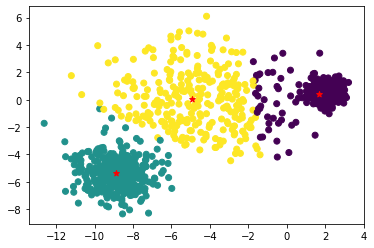

                      KMeans




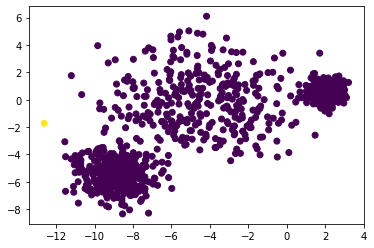

              Single Link Clustering




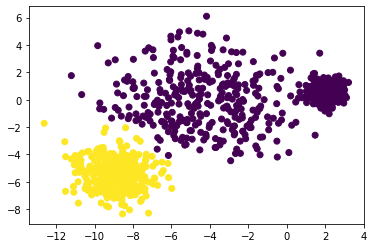

              Average Link Clustering




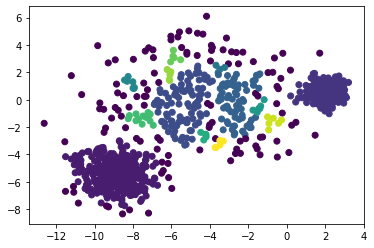

                      DBSCAN




In [ ]:
#@title
varied_kmeanshow_plot = kmeanshow_plot(kmeans(3,varied_x),varied_x)
print ("                      KMeans\n\n")

varied_single_plot = show_plot(Single_Link_Clustering(varied_x),varied_x)
print ("              Single Link Clustering\n\n")

varied_average_plot = show_plot(Average_Link_Clustering(varied_x),varied_x)
print ("              Average Link Clustering\n\n")

varied_dbscan_plot = show_plot(DBSCAN(varied_x),varied_x)
print ("                      DBSCAN\n\n")

## Conclusion

**Based on the results, it shows that silhouette and elbow method is effective in finding the optimal number of clusters in kmeans algorithm.**

<br/>

**Different types of unsupervised models has different use cases depends on the pattern of the data. For moon pattern, single and average link hierarchical clustering performs the best. For blobs pattern, single and average link hierarchical clustering performs the best. For circle pattern, single link hierarchical clustering performs the best. For aniso pattern, average link hierarchical clustering performs the best. Kmeans clustering performs the best. It would be a great workflow to check into the pattern of the data first and check the appropriate algorithm that works best for that pattern.**